In [1]:
from Werner import werner, witness
from Tools.MyGates import SWAP, CX, Id, Z, identity_qb, product, pauli
from Tools.MyQM import  tensor, partial_trace, hs_norm, Ad, trace
rho = werner(1,0.3)
def pauli_group(n):
    plus = [tensor(*list(map(pauli, index))) 
            for index in product([0,1,2,3], repeat = n) ]
    return plus

W = witness()
expectations = [trace(W@p) for p in pauli_group(2)]

print(expectations)

[(1+0j), 0j, 0j, 0j, 0j, (0.9999999999999996+0j), 0j, 0j, 0j, 0j, (0.9999999999999996+0j), 0j, 0j, 0j, 0j, (1+0j)]


In [11]:
import numpy as np
from itertools import product
from functools import reduce
from operator import add

PauliName_dict = {0:'I', 1:'X', 2:'Y', 3:'Z'}

def tomo(rho):
    n = int(np.log2(len(rho)))
    return {
         reduce(add, [ PauliName_dict[i] for i in index ] ) # key
        : trace(rho @ tensor(*list(map(pauli, index))) )  # value
        for index in product([0,1,2,3], repeat = n)  }  # induction

tomo(W)

{'II': (1+0j),
 'IX': 0j,
 'IY': 0j,
 'IZ': 0j,
 'XI': 0j,
 'XX': (0.9999999999999996+0j),
 'XY': 0j,
 'XZ': 0j,
 'YI': 0j,
 'YX': 0j,
 'YY': (0.9999999999999996+0j),
 'YZ': 0j,
 'ZI': 0j,
 'ZX': 0j,
 'ZY': 0j,
 'ZZ': (1+0j)}

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Operator
from Werner import werner


In [4]:
from numpy import trace
import numpy as np

In [5]:
rho = werner(3, 0.2)
qc = QuantumCircuit(6)
qc.swap([0,1,2], [3,4,5])
U = np.array(Operator(qc))
trace(U @ rho)

(0.2+0j)

In [18]:
eigval = np.linalg.eigvals(rho)
np.diag(eigval).shape

(64, 64)

In [16]:
all(np.linalg.eig(rho)[0] == )

True

Test QNN for werner

In [26]:
from Werner import QNN_for_Werner
from numpy import trace
from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Operator
import numpy as np
num = 2
num_layer = 5
num_anc = 1
qnn = QNN_for_Werner(num, num_layer, num_anc)
Ot = qnn.get_O_tilde(qnn.rand_para())
print(Ot.shape)
H = qnn.get_H()
print(H.shape)
qc = QuantumCircuit( 2*num)
qc.swap(range(num), range(num, num*2))
W = np.array(Operator(qc))
print(H.shape)
    # print(W)
print(f"trace(O_tilta) = {trace(Ot)}\n" + 
      f"trace(W) = {trace(W)}\n" + 
      f"trace(H) = {trace(H)}" )


(32, 32)
(16, 16)
(16, 16)
trace(O_tilta) = (7.999999999999997+0j)
trace(W) = (4+0j)
trace(H) = (7.999999999999997+0j)


In [21]:
from Tools.Gardient import grad_des
from Tools.MyQM import hs_norm
y_lst = []
x_lst = []
def callback(y,x):
    y_lst.append(y)
    x_lst.append(x)
def cost(para):
    qnn.get_O_tilde(para)
    H = qnn.get_H()
    return hs_norm(H - W)

In [18]:
grad_des(cost, qnn.rand_para(), callback, eta=0.1)

15.87084153399572


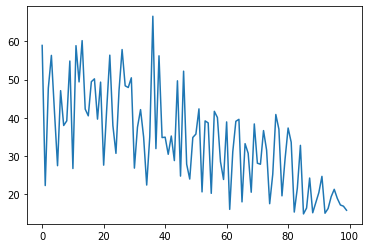

In [19]:
import matplotlib.pyplot as plt
print(y_lst[-1])
plt.plot(y_lst)

In [27]:
hs_norm(Ot - qnn.observable)

58.94891150598415

Construct W

In [4]:
import numpy as np
A  = np.matrix([[2,-1], [-1,2]])
np.linalg.eig(A)

(array([3., 1.]),
 matrix([[ 0.70710678,  0.70710678],
         [-0.70710678,  0.70710678]]))